1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues:
 [ 2.31715516e+00  6.85847839e-01 -7.46503945e-16] 

Eigenvectors:
 [[-0.49821315 -0.7879742  -0.36177385]
 [-0.56677532  0.61172736 -0.55186536]
 [-0.65616262  0.06990209  0.75137495]] 

SVD Eigenvalues:
 [2.31715516e+00 6.85847839e-01 1.16370088e-31]
SVD Eigenvectors: 
 [[ 0.49821315  0.7879742   0.36177385]
 [ 0.56677532 -0.61172736  0.55186536]
 [ 0.65616262 -0.06990209 -0.75137495]]

Eigenvalues Close Match: True
Eigenvectors Close Match: True

The percent variability explained by each principal component is:
[77.161 22.839  0.   ]
PC1: 77.161%
PC2: 22.839%
PC3: 3.8751e-30%

Explanation: The amount of variability explained by the third principal component is close to 0% and for the top two principal compenents combined is above 99%.  
This is consistent with the way the dataset was constructed, 
as the third variable is a linear combination of the first two and does not provide much additional information

Number of components to retain at least 99% of variability: 2


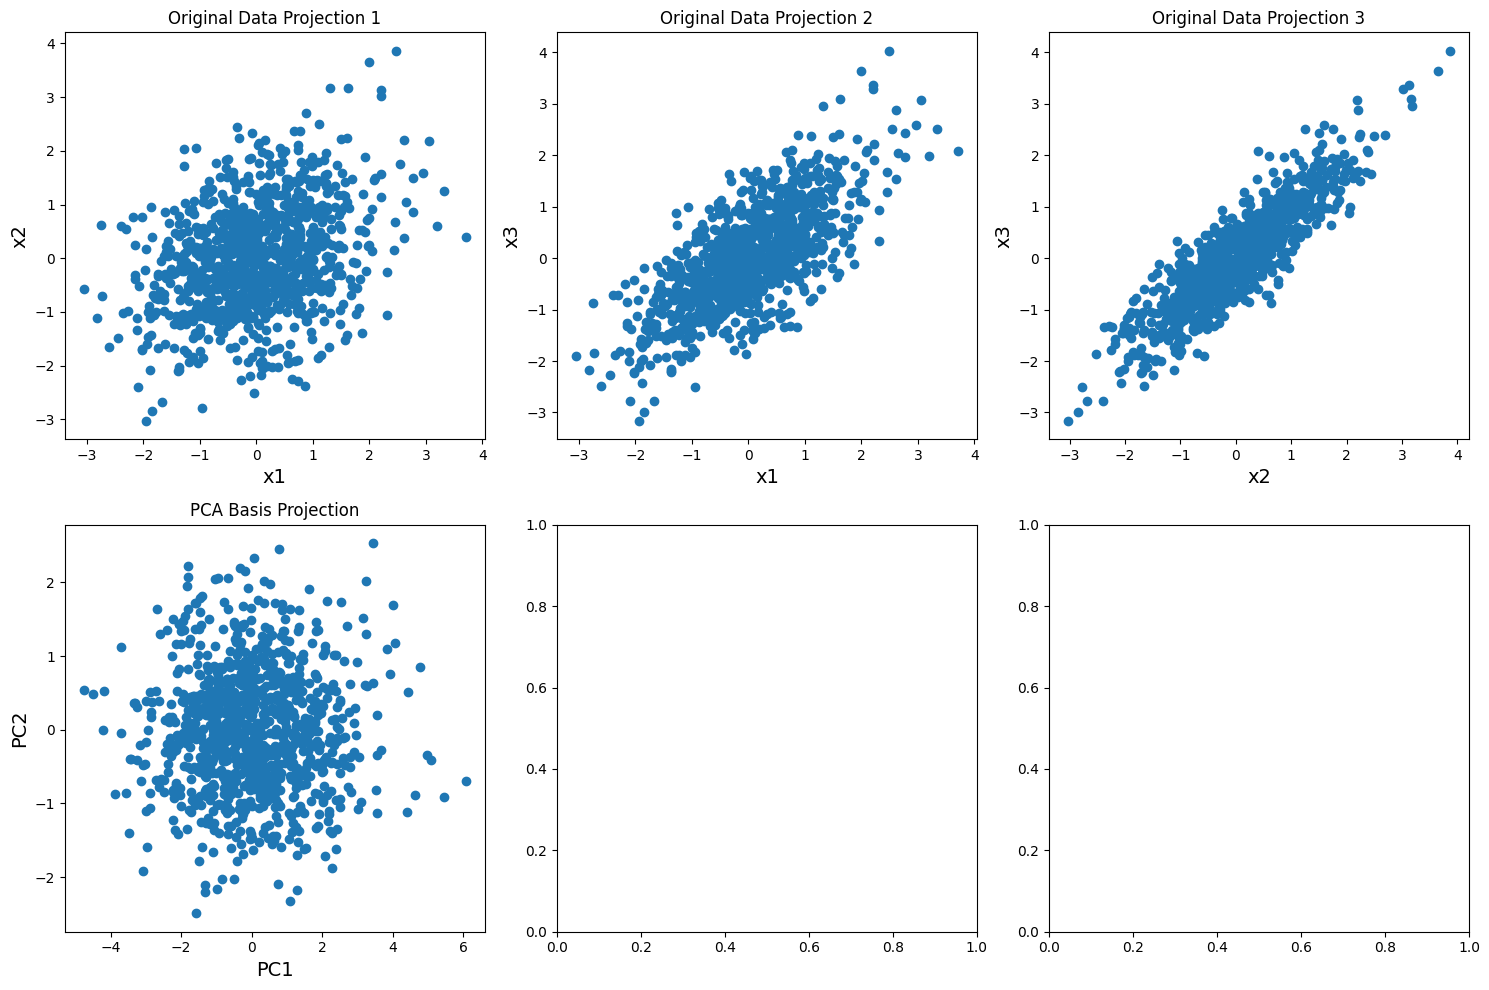

In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(100)

# 1. Generate random samples for each variable
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = x1 + np.random.normal(0, 3, n)
x3 = 2 * x1 + x2

X = np.array([x1, x2, x3]).T

# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 2. Finding the covariance matrix
cov = np.cov(X, rowvar=False)

# Finding the eigenvalues and eigenvectors using eigendecomposition
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

# 3. Finding the eigenvalues and eigenvectors using SVD
U, s, Vt = la.svd(X)
l_svd = s**2 / (n - 1)

print("SVD Eigenvalues:\n", l_svd)
print("SVD Eigenvectors: \n", Vt.T)

#comparing eigenvalues from both methods
eigenvalues_close = np.allclose(l, l_svd)

print("\nEigenvalues Close Match:", eigenvalues_close)

#normalizing first entry of both eigenvector matrices for comparability
V = np.sign(V[0, :]) * V
Vt = np.sign(Vt[0, :]) * Vt

# Comparing eigenvectors
print("Eigenvectors Close Match:", np.allclose(V, Vt.T))

# how much varaiance is captured by each eigenvalue
explained_var_ratio = l_svd / np.sum(l_svd)
cumulative_var_ratio = np.cumsum(explained_var_ratio)

explained_var_ratio_percentage = explained_var_ratio * 100
np.set_printoptions(precision=3, suppress=True)
print(f"\nThe percent variability explained by each principal component is:" 
f"\n{explained_var_ratio_percentage}\n"
f"PC1: {explained_var_ratio_percentage[0]:.5}%\n"
f"PC2: {explained_var_ratio_percentage[1]:.5}%\n"
f"PC3: {explained_var_ratio_percentage[2]:.5}%")
#The percentage varaiability explained by each component is: 
# principal component 1: 77.161%
# principal component 2: 22.839 % 
# principal companent 3: ~ 0 %

explanation = """The amount of variability explained by the third principal component is close to 0% and for the top two principal compenents combined is above 99%.  
This is consistent with the way the dataset was constructed, 
as the third variable is a linear combination of the first two and does not provide much additional information"""
print()
print(f"Explanation: {explanation}")


# Determine the number of components needed to retain at least 99% of the variability
num_components = np.argmax(cumulative_var_ratio >= 0.99) + 1

print("\nNumber of components to retain at least 99% of variability:", num_components)

# Reduce the dimensionality to retain at least 99% of the total variability
X_reduced = X @ V[:, :num_components]
X_new = X @ V

print("\nOriginal Data Shape:", X.shape)
print("Reduced Data Shape:", X_reduced.shape)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original data scatter plots
axes[0, 0].scatter(X[:, 0], X[:, 1])
axes[0, 0].set_title('Original Data Projection 1')
axes[0, 0].set_xlabel('x1', fontsize=14)
axes[0, 0].set_ylabel('x2', fontsize=14)
axes[0, 1].scatter(X[:, 0], X[:, 2])
axes[0, 1].set_title('Original Data Projection 2')
axes[0, 1].set_xlabel('x1', fontsize=14)
axes[0, 1].set_ylabel('x3', fontsize=14)
axes[0, 2].scatter(X[:, 1], X[:, 2])
axes[0, 2].set_title('Original Data Projection 3')
axes[0, 2].set_xlabel('x2', fontsize=14)
axes[0, 2].set_ylabel('x3', fontsize=14)

# New basis scatter plot
axes[1, 0].scatter(X_reduced[:, 0], X_reduced[:, 1])
axes[1, 0].set_title('PCA Basis Projection')
axes[1, 0].set_xlabel('PC1', fontsize=14)
axes[1, 0].set_ylabel('PC2', fontsize=14)

plt.tight_layout()
plt.show()

The amount of variability explained by the third principal component is close to 0% and for the top two principal compenents combined is above 99%.  
This is consistent with the way the dataset was constructed, 
as the third variable is a linear combination of the first two and does not provide much additional information

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigenvalues with Noise:
 [ 2.309 -0.     0.675  1.194  0.837  1.125  0.892  1.061  1.037  1.02
  0.997  0.93   0.936] 

Eigenvectors with Noise:
 [[-0.484 -0.346  0.752  0.019 -0.049  0.033 -0.146  0.092 -0.09   0.135
  -0.126  0.062 -0.043]
 [-0.569 -0.567 -0.553 -0.026  0.094 -0.069  0.099 -0.089  0.06  -0.063
   0.078 -0.044 -0.033]
 [-0.655  0.748 -0.072 -0.011  0.049 -0.037  0.008 -0.025  0.004  0.015
   0.001 -0.004 -0.045]
 [-0.024  0.    -0.006  0.273 -0.236 -0.447 -0.377  0.279  0.315 -0.089
   0.051 -0.531  0.241]
 [-0.011  0.    -0.037  0.137  0.209 -0.163 -0.195  0.42  -0.437 -0.11
   0.569  0.369  0.178]
 [-0.013  0.     0.044  0.016  0.363  0.501 -0.436 -0.009  0.547 -0.295
   0.161  0.112 -0.015]
 [-0.011 -0.    -0.081 -0.36   0.359  0.045  0.056  0.469 -0.062 -0.058
  -0.538 -0.045  0.459]
 [ 0.012  0.     0.176 -0.257  0.28  -0.114 -0.103 -0.482 -0.376 -0.47
   0.118 -0.424  0.115]
 [ 0.034 -0.    -0.198  0.443  0.221  0.028 -0.51  -0.308 -0.3    0.335
  -0.378  0.074 

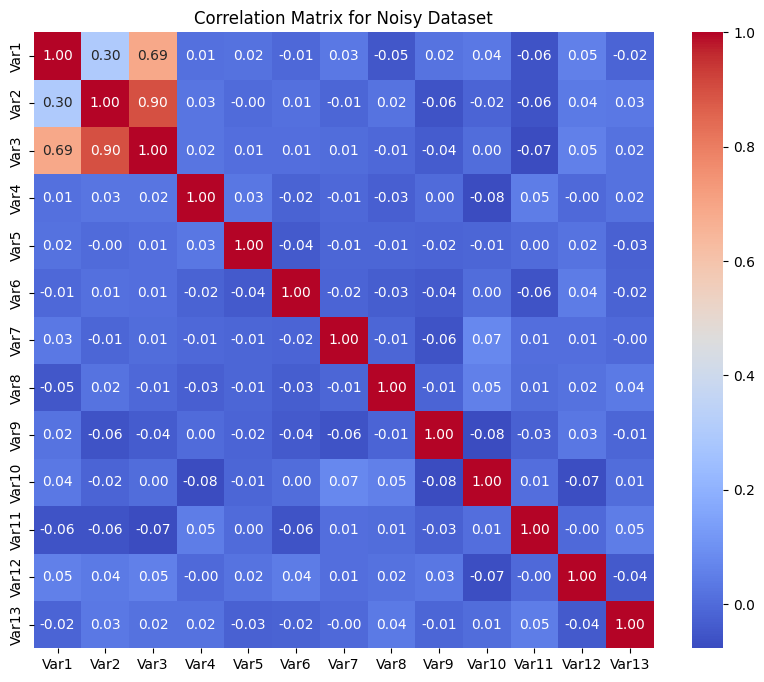

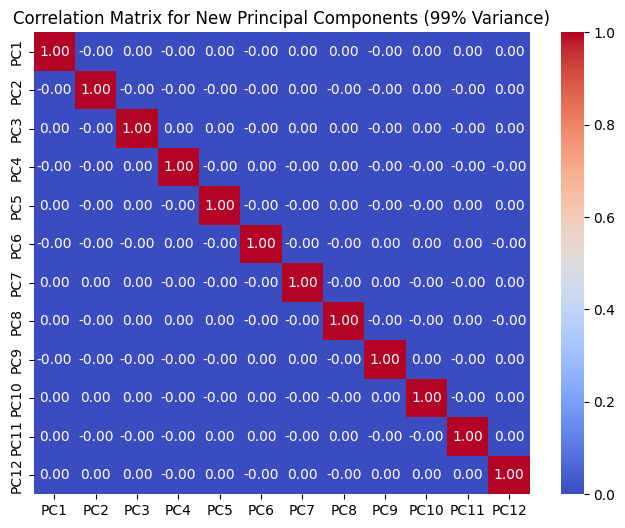

In [2]:
# Generate random samples for each variable (original dataset)
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = x1 + np.random.normal(0, 3, n)
x3 = 2 * x1 + x2

X_original = np.array([x1, x2, x3]).T

# Standardize the data
X_original = (X_original - np.mean(X_original, axis=0)) / np.std(X_original, axis=0)

# Generate uncorrelated random noise variables
num_noise_variables = 10
noise_std = 0.1  # Adjust the standard deviation as needed
noise = np.random.normal(0, noise_std, size=(n, num_noise_variables))

# Add noise to the original dataset
X_with_noise = np.hstack((X_original, noise))
X_with_noise = (X_with_noise - np.mean(X_with_noise, axis=0)) / np.std(X_with_noise, axis=0) 

# Perform PCA on the new dataset
# Finding the covariance matrix
cov_with_noise = np.cov(X_with_noise, rowvar=False)

# Finding the eigenvalues and eigenvectors using eigendecomposition
l_with_noise, V_with_noise = la.eig(cov_with_noise)
l_with_noise = np.real_if_close(l_with_noise)

# 5. Compare PCA results with the previous ones
print("Eigenvalues with Noise:\n", l_with_noise, '\n')
print("Eigenvectors with Noise:\n", V_with_noise, '\n')

indices = np.argsort(l_with_noise)[::-1]
l_with_noise = l_with_noise[indices]
V_with_noise = V_with_noise[:,indices]

l_in_percentages= l_with_noise/np.sum(l_with_noise)
cumulative_sum = np.cumsum(l_in_percentages)
print("Cumulative sum: ", cumulative_sum)
num_components = np.argmax(cumulative_sum >= 0.99) + 1
X_reduced = X_with_noise @ V_with_noise[:,:num_components]

print("\nOriginal Data Shape:", X_with_noise.shape)
print("Reduced Data Shape:", X_reduced.shape)


explanation = """Similar to the PCA applied to the earlier dataset with only 3 variables, where the new basis comprised just 2 variables,
this subsequent PCA analysis achieved a limited reduction in dimensionality, reducing the total variables from 13 to 12.
This outcome aligns with expectations, given the addition of 10 uncorrelated variables in the current dataset.
The presence of these 10 variables ensures that a substantial portion of the data variance is encapsulated within them.
As a result, dimensionality reduction only leads to a one-variable decrease, similar to the earlier example."""
print()
print(explanation)

# Plot correlation matrix for the noisy dataset
correlation_matrix_noisy = np.corrcoef(X_with_noise, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_noisy, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=[f'Var{i}' for i in range(1, X_with_noise.shape[1] + 1)],
            yticklabels=[f'Var{i}' for i in range(1, X_with_noise.shape[1] + 1)])
plt.title('Correlation Matrix for Noisy Dataset')
plt.show()

# Retain principal components that preserve more than 99% of the variance
num_components = np.argmax(np.cumsum(l_with_noise) / np.sum(l_with_noise) >= 0.99) + 1
X_reduced_with_noise = X_with_noise @ V_with_noise[:, :num_components]

# Plot correlation matrix for the new principal components
correlation_matrix_reduced = np.corrcoef(X_reduced_with_noise, rowvar=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=[f'PC{i}' for i in range(1, num_components + 1)],
            yticklabels=[f'PC{i}' for i in range(1, num_components + 1)])
plt.title('Correlation Matrix for New Principal Components (99% Variance)')
plt.show()


Similar to the PCA applied to the earlier dataset with only 3 variables, where the new basis comprised just 2 variables,
this subsequent PCA analysis achieved a limited reduction in dimensionality, reducing the total variables from 13 to 12.
This outcome aligns with expectations, given the addition of 10 uncorrelated variables in the current dataset.
The presence of these 10 variables ensures that a substantial portion of the data variance is encapsulated within them.
As a result, dimensionality reduction only leads to a one-variable decrease, akin to the earlier example.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [4]:
# Loading the MAGIC dataset using pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
column_names = [f"feature_{i}" for i in range(10)] + ["class"]

df = pd.read_csv("./data/magic04.data", names=column_names)

# Separate features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df["class"].values

# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 2. Finding the covariance matrix
cov = np.cov(X, rowvar=False)

# Finding the eigenvalues and eigenvectors using eigendecomposition
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

indices = np.argsort(l)[::-1]
l = l[indices]
V = V[:,indices]

# How much variance is captured by each eigenvalue
var_ratio = l / np.sum(l)
cumulative_var_ratio = np.cumsum(var_ratio)
print(var_ratio)
# Determine the number of components needed to retain at least 95% of the variability
num_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

print("\nNumber of components to retain at least 99% of variability:", num_components)

# Reduce the dimensionality to retain at least 99% of the total variability
X_reduced = X @ V[:, :num_components]
X_new = X @ V

print("\nOriginal Data Shape:", X.shape)
print("Reduced Data Shape:", X_reduced.shape)


Eigenvalues:
 [4.224 1.575 0.02  0.155 0.22  0.408 0.742 0.65  0.994 1.012] 

Eigenvectors:
 [[-0.408  0.226  0.018 -0.09   0.753 -0.437 -0.119 -0.015  0.025 -0.001]
 [-0.395  0.245 -0.012  0.428 -0.539 -0.495 -0.058 -0.169  0.095 -0.153]
 [-0.449 -0.093  0.108 -0.816 -0.322 -0.001 -0.016 -0.028  0.057 -0.071]
 [ 0.442  0.188  0.749 -0.149 -0.072 -0.331 -0.181 -0.104 -0.109  0.129]
 [ 0.429  0.196 -0.653 -0.315 -0.105 -0.389 -0.206 -0.116 -0.116  0.139]
 [ 0.145 -0.487 -0.    -0.007  0.139 -0.114  0.023 -0.722  0.214 -0.377]
 [-0.005 -0.6    0.003  0.091 -0.036 -0.234 -0.599  0.46   0.054 -0.058]
 [-0.012  0.031 -0.    -0.009  0.017  0.014 -0.008  0.057 -0.795 -0.603]
 [ 0.097  0.457 -0.006 -0.039  0.027  0.365 -0.526  0.003  0.386 -0.47 ]
 [-0.257 -0.012 -0.005  0.109 -0.016  0.319 -0.521 -0.459 -0.364  0.454]] 

[0.422 0.158 0.101 0.099 0.074 0.065 0.041 0.022 0.015 0.002]

Number of components to retain at least 99% of variability: 7

Original Data Shape: (19020, 10)
Reduced Data Sh